___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score





import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

In [3]:
# Display the first few rows to understand the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()
# No Null values and one Non-Numeric Feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()
# it seems that we do not have outliers and we do not need to scale

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# we do not need the Customer ID feature so i will drop it
df = df.drop(columns=['CustomerID'])

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


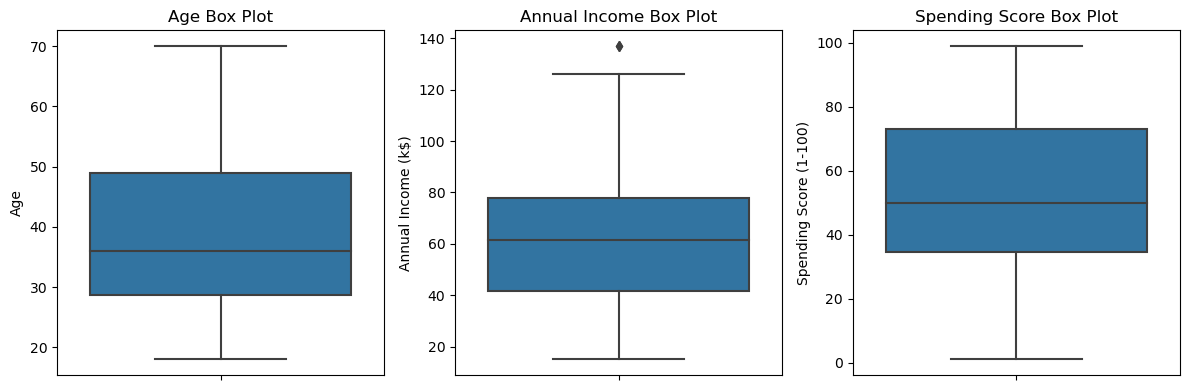

In [8]:
# Create a box plot for 'Age'
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.boxplot(y='Age', data=df)
plt.title('Age Box Plot')

# Create a box plot for 'Annual Income (k$)'
plt.subplot(132)
sns.boxplot(y='Annual Income (k$)', data=df)
plt.title('Annual Income Box Plot')

# Create a box plot for 'Spending Score (1-100)'
plt.subplot(133)
sns.boxplot(y='Spending Score (1-100)', data=df)
plt.title('Spending Score Box Plot')

plt.tight_layout()
plt.show()

In [9]:
from ipywidgets import interact

@interact(col=df.columns[1:], chart=["countplot", "histogram"])
def plot(col, chart):
    colors = np.random.choice(['blue', 'red', 'green'])
    if chart == "countplot":
        plt.figure(figsize=(20, 10))
        ax = sns.countplot(x=col, data=df)
        plt.title(col + ' Countplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])

    else:
        plt.figure(figsize=(20, 10))
        ax = sns.histplot(data=df, x=col, bins=80, kde=True, color=colors)
        plt.title(col + ' Histplot')
        plt.xlabel(col)
        ax.bar_label(ax.containers[0])


# We are investigating the age range of the customer group.
# We are investigating the annual revenues of customer groups.
# We are investigating the spending scores of customer groups.

interactive(children=(Dropdown(description='col', options=('Age', 'Annual Income (k$)', 'Spending Score (1-100…

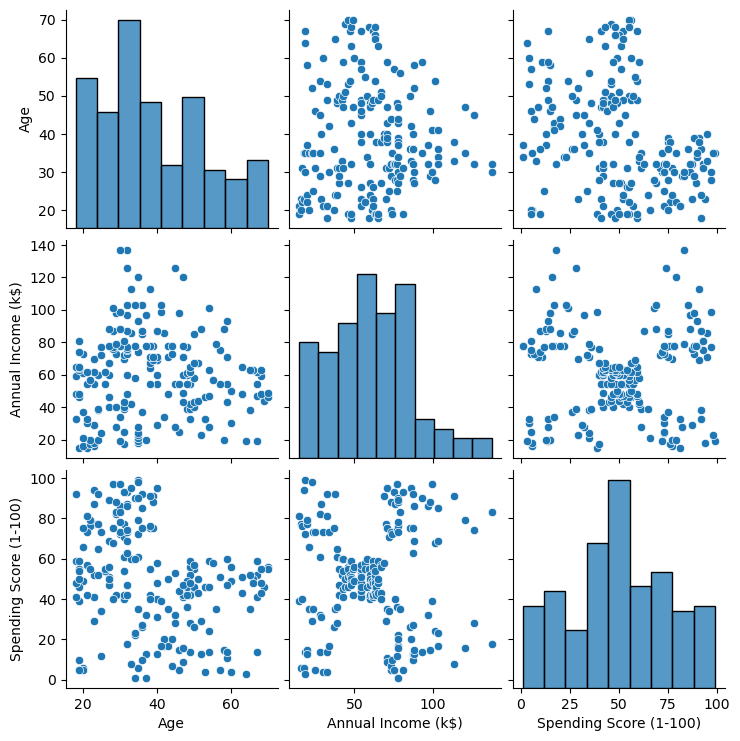

In [10]:
sns.pairplot(df)
plt.show()

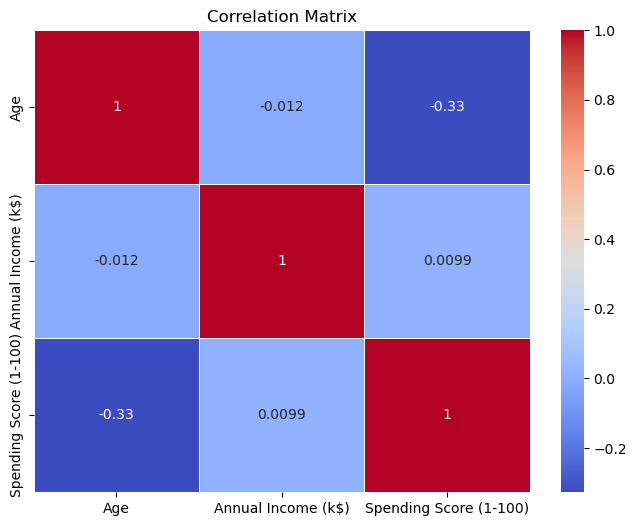

In [11]:
# Calculate the Pearson correlation matrix
dff = df.drop(columns="Gender")
correlation_matrix = dff.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# we do not have high corr

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [12]:
# Create a new DataFrame with 'Age' and 'Spending Score'
df1 = df.drop(columns="Gender")

# Display the first few rows of the new DataFrame
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
X_age_ss = df1.loc[:,['Age','Spending Score (1-100)']]
X_age_ss

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

In [14]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X_age_ss)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

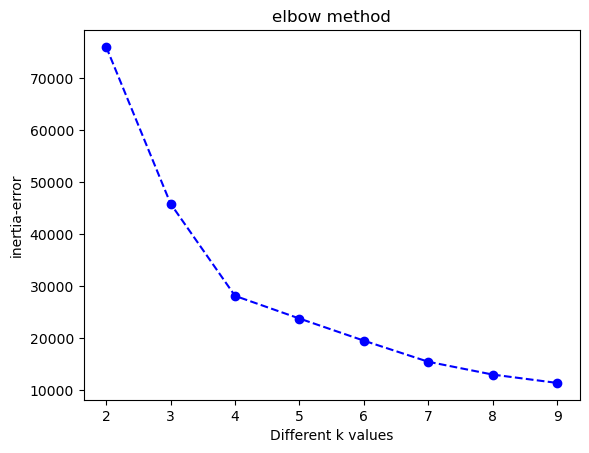

In [15]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
# we can see that our elbow method shows us that 4 clusters is the best choice

In [16]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [17]:
hopkins(X_age_ss, 0.05)
# also hopkins test shows us that our data is suitable for clustring

0.7805119901957117

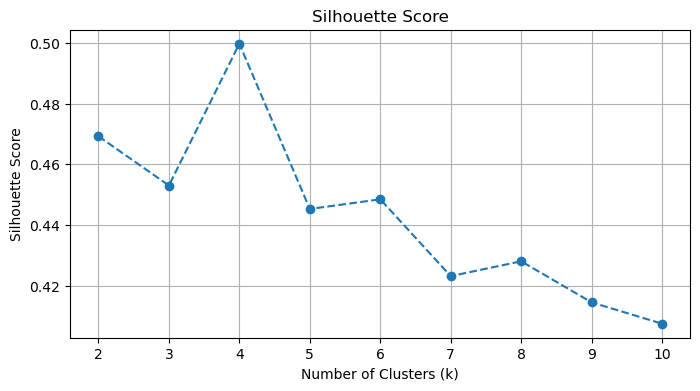

In [18]:
# Calculate the Silhouette score for a range of cluster numbers
silhouette_scores = []
for k in range(2, 11):  # Considering cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_age_ss)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_age_ss, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
# siluouette score also showing 4 clusters as the highest score

#### *iii. Apply K Means*

In [19]:
from sklearn.cluster import KMeans

# Set the number of clusters to 4
num_clusters = 4

# Create a K-Means model
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

kmeans.fit(X_age_ss)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [20]:
df_age_ss = X_age_ss.copy()
df_age_ss

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [21]:
df_age_ss["cluster_in_Kmeans"] = kmeans.fit_predict(X_age_ss)

In [22]:
df_age_ss

,Age,Spending Score (1-100),cluster_in_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


#### *iv. Visualizing and Labeling All the Clusters*

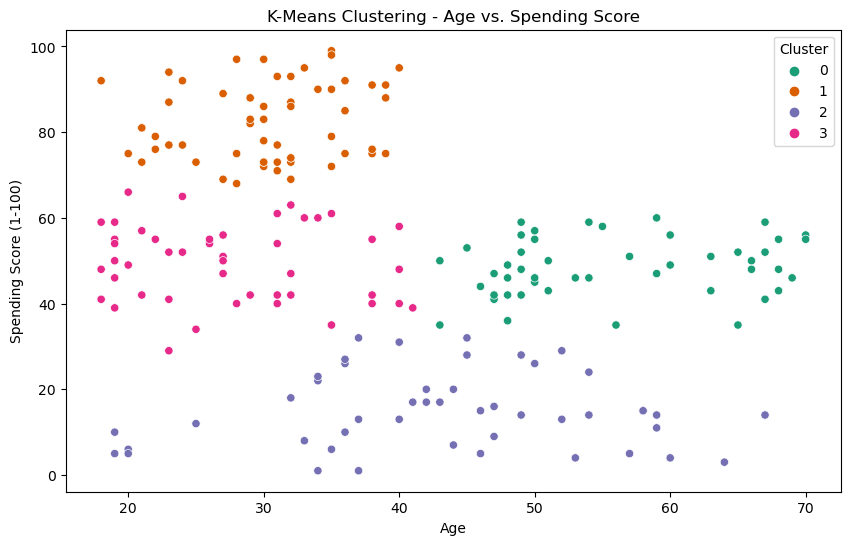

In [23]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_age_ss, x='Age', y='Spending Score (1-100)', hue='cluster_in_Kmeans', palette='Dark2')
plt.title('K-Means Clustering - Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [24]:
# Create a dictionary to map cluster numbers to labels
cluster_labels = {
    0: "Economical",
    1: "Spontaneous",
    2: "Prudent",
    3: "Generous"
}

# Assign labels to clusters in a new column 'Cluster Labels'
df_age_ss['Customer Type'] = df_age_ss['cluster_in_Kmeans'].map(cluster_labels)

In [25]:
df_age_ss

,Age,Spending Score (1-100),cluster_in_Kmeans,Customer Type
0,19,39,3,Generous
1,21,81,1,Spontaneous
2,20,6,2,Prudent
3,23,77,1,Spontaneous
4,31,40,3,Generous
...,...,...,...,...
195,35,79,1,Spontaneous
196,45,28,2,Prudent
197,32,74,1,Spontaneous
198,32,18,2,Prudent


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [26]:
# Create a new DataFrame with 'Annual Income' and 'Spending Score'
X_ai_ss = df1.loc[:,['Annual Income (k$)','Spending Score (1-100)']]

# Display the first few rows of the new DataFrame
X_ai_ss.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

In [27]:
hopkins(X_ai_ss, 0.05)
# data is suitable for clustring

0.749626182196697

In [28]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X_ai_ss)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

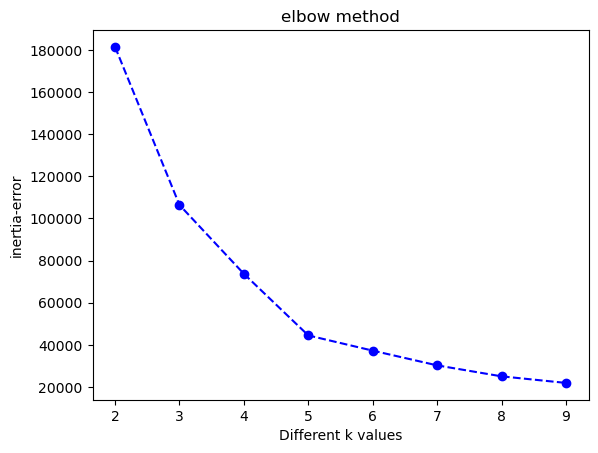

In [29]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")
# we can see that our elbow method shows us that 5 clusters is the best choice

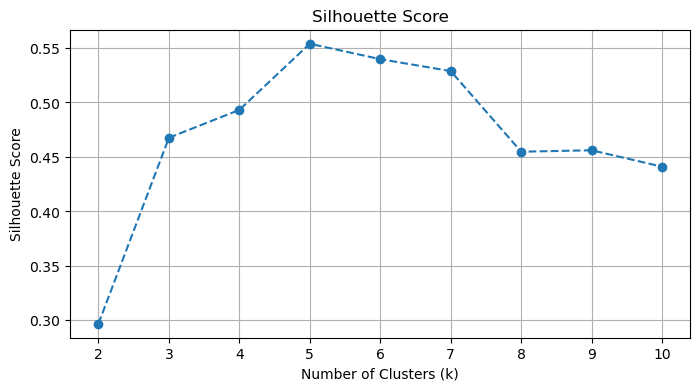

In [30]:
# Calculate the Silhouette score for a range of cluster numbers
silhouette_scores = []
for k in range(2, 11):  # Considering cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_ai_ss)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_ai_ss, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
# siluouette score also showing 5 clusters as the highest score

#### *iii. Apply K Means*

In [31]:
from sklearn.cluster import KMeans

# Set the number of clusters to 5
num_clusters = 5

# Create a K-Means model
kmeans1 = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

kmeans1.fit(X_ai_ss)

KMeans(n_clusters=5, n_init=10, random_state=0)

In [32]:
df_ai_ss = X_ai_ss.copy()
df_ai_ss.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [33]:
df_ai_ss['cluster_in_Kmeans'] = kmeans1.fit_predict(X_ai_ss)
df_ai_ss

,Annual Income (k$),Spending Score (1-100),cluster_in_Kmeans
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


#### *iv. Visualizing and Labeling All the Clusters*

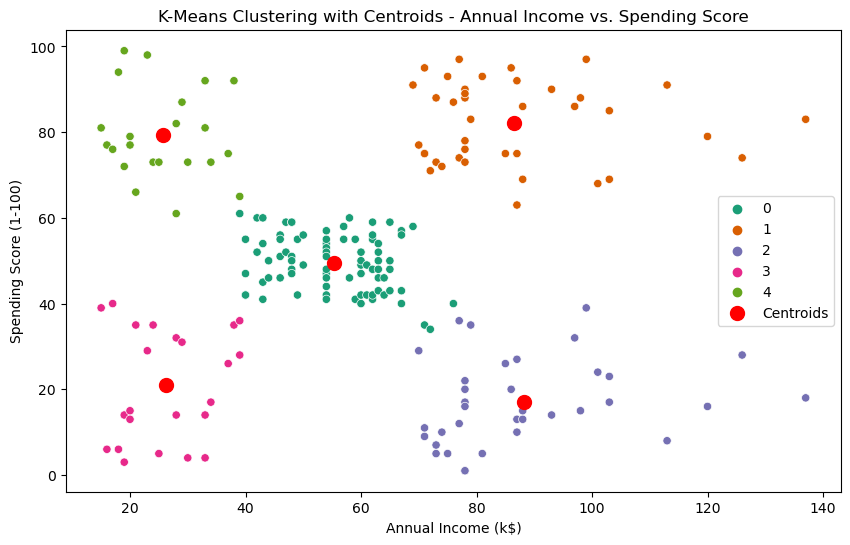

In [34]:
# Create a scatter plot to visualize the clusters and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ai_ss, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_in_Kmeans', palette='Dark2', legend='full')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.title('K-Means Clustering with Centroids - Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [35]:
# Create a dictionary to map cluster numbers to labels
cluster_labels = {
    0: "Budget",
    1: "Affluent",
    2: "Economical",
    3: "Average",
    4: "Luxury"
}

# Assign labels to clusters in a new column 'Cluster Labels'
df_ai_ss['Customer Type'] = df_ai_ss['cluster_in_Kmeans'].map(cluster_labels)

In [36]:
df_ai_ss.sample(10)

,Annual Income (k$),Spending Score (1-100),cluster_in_Kmeans,Customer Type
127,71,95,1,Affluent
110,63,52,0,Budget
55,43,41,0,Budget
152,78,20,2,Economical
47,40,47,0,Budget
90,59,55,0,Budget
154,78,16,2,Economical
159,78,73,1,Affluent
191,103,69,1,Affluent
36,34,17,3,Average


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [37]:
X_age_ss

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [38]:
hc_ward = linkage(y=X_age_ss, method="ward")
hc_complete = linkage(X_age_ss, "complete")
hc_average = linkage(X_age_ss, "average")
hc_single = linkage(X_age_ss, "single")

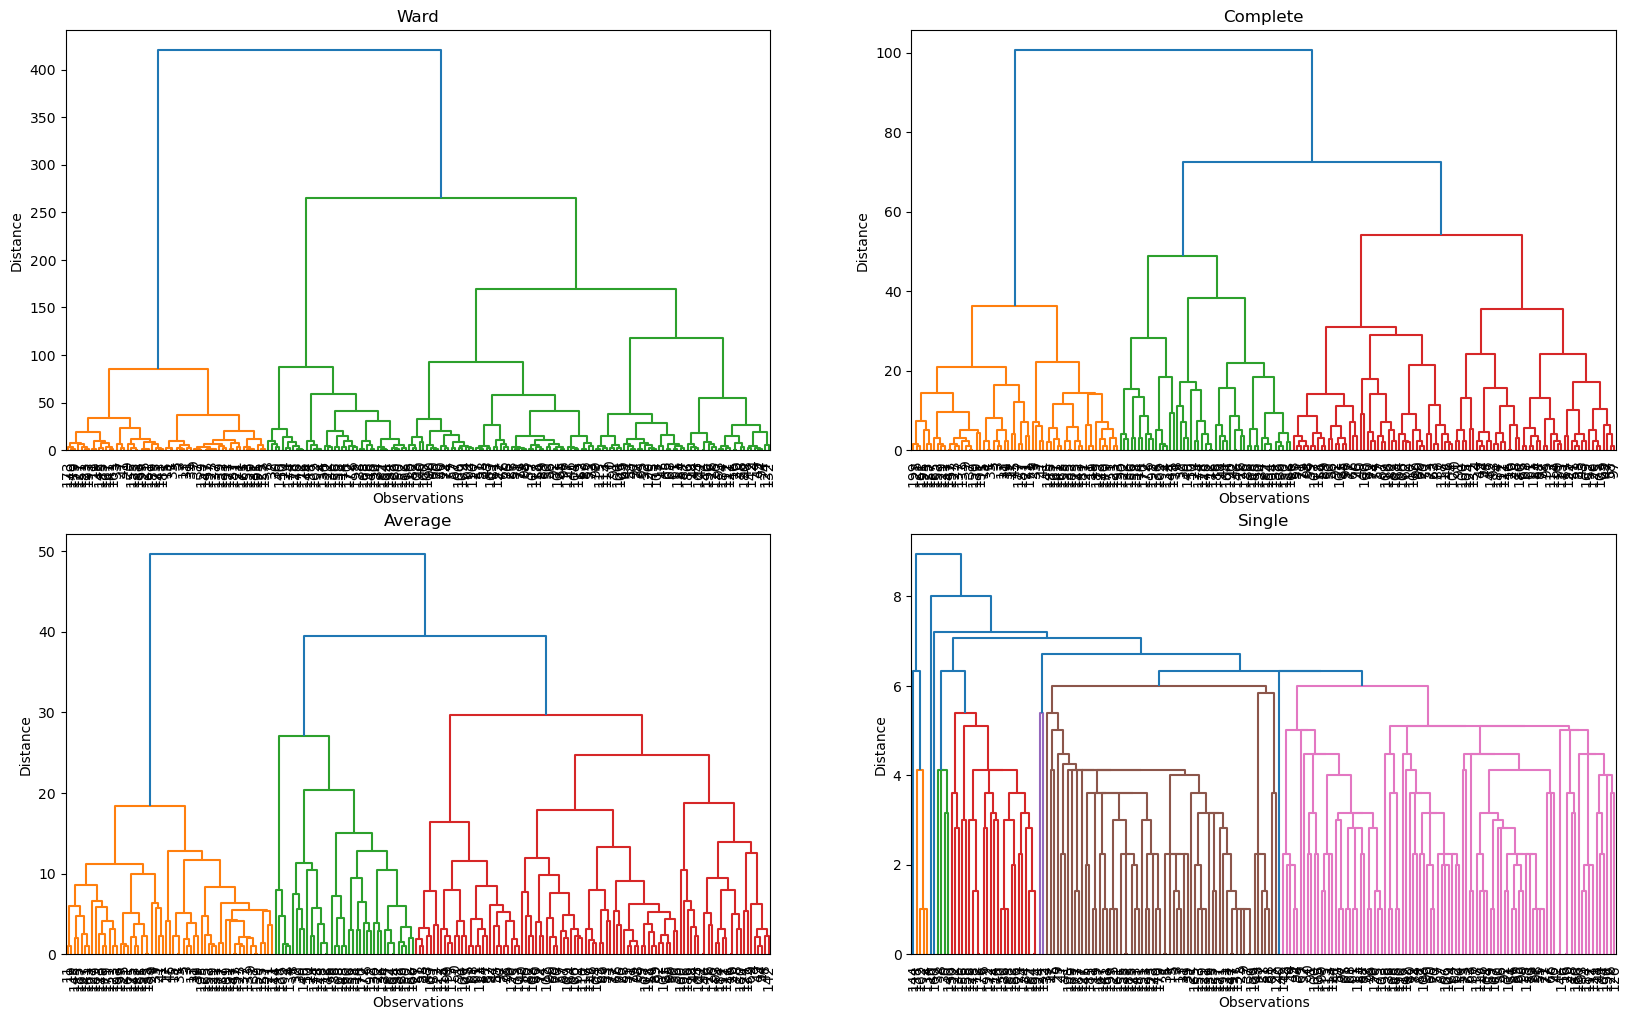

In [39]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

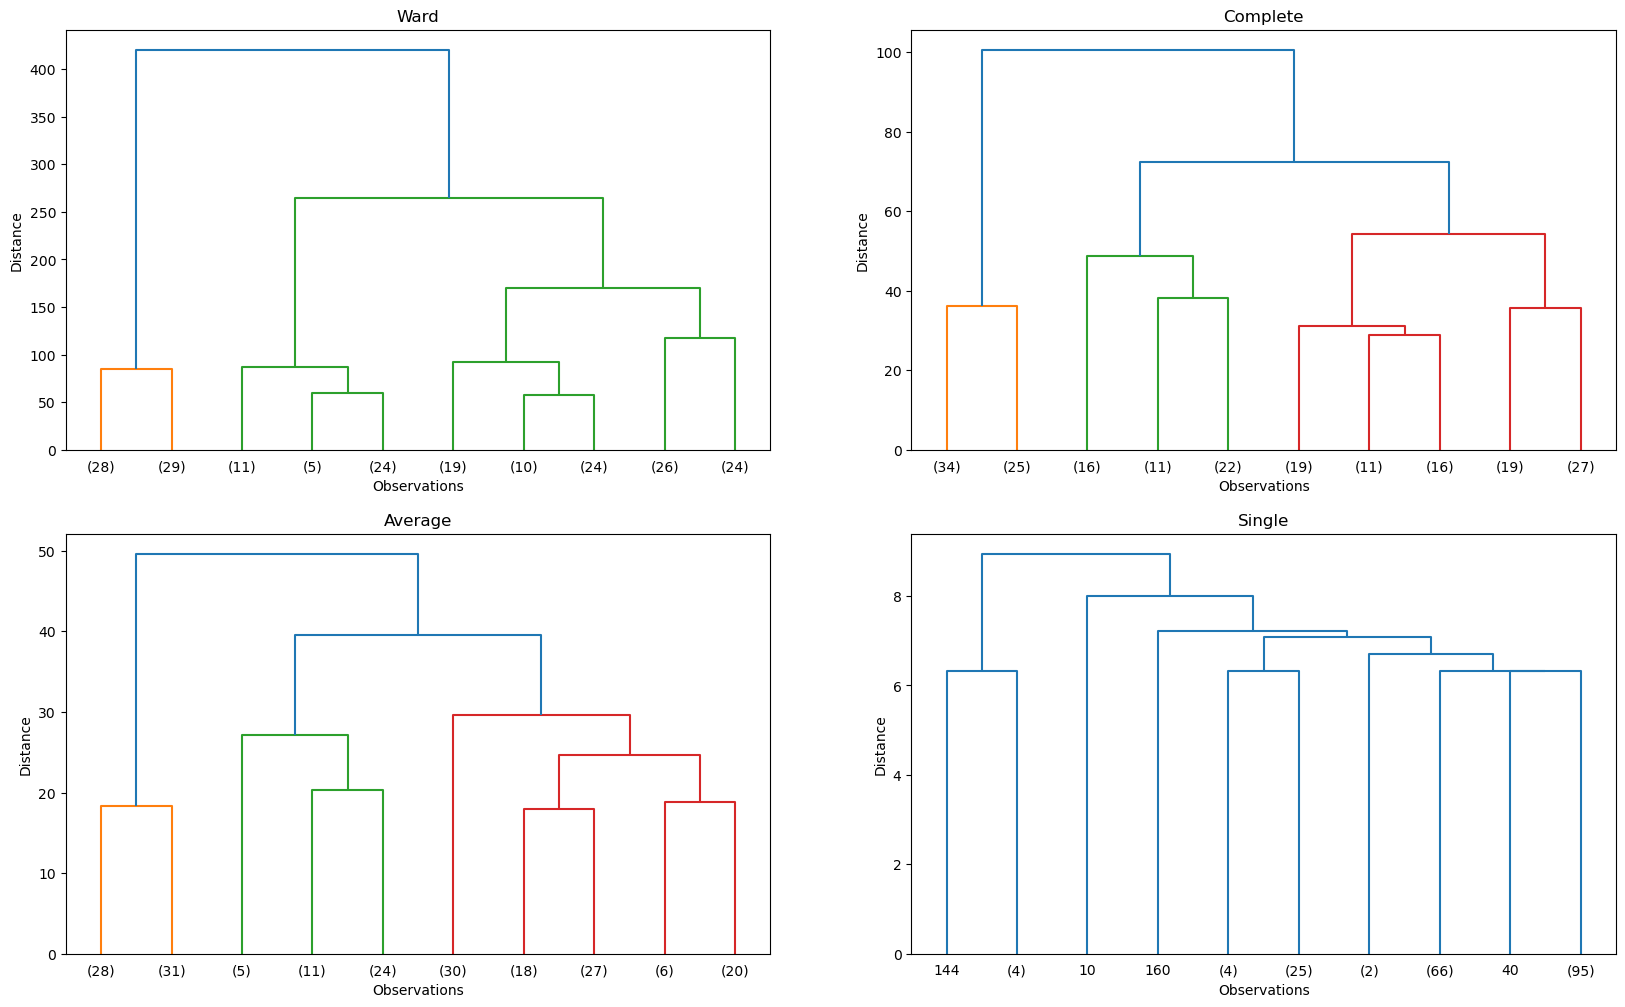

In [40]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# as i see 2 or 4 is good but i prefer 4

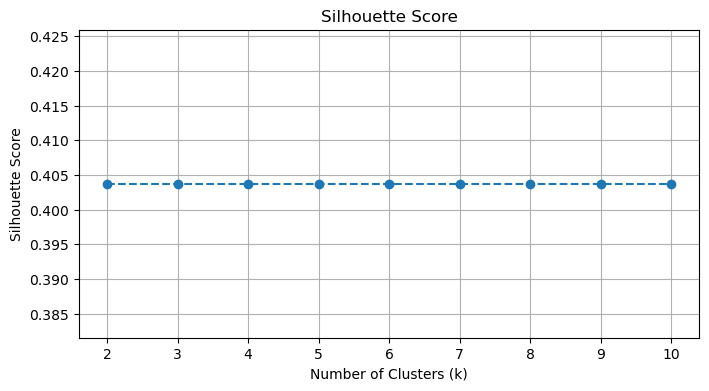

In [41]:
silhouette_scores = []
for k in range(2, 11):  # Considering cluster numbers from 2 to 10
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_age_ss)
    labels = Agg_model.labels_
    silhouette_avg = silhouette_score(X_age_ss, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [42]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_age_ss)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_age_ss, model.labels_)}')
# silhouette score shows a pretty same scores for all the clusters but 4 is the highest one

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


In [43]:
agg_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_model.fit(X_age_ss)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [44]:
y_agg = agg_model.fit_predict(X_age_ss)

In [45]:
df_age_ss['cluster_Agg'] = y_agg
df_age_ss.head()

,Age,Spending Score (1-100),cluster_in_Kmeans,Customer Type,cluster_Agg
0,19,39,3,Generous,0
1,21,81,1,Spontaneous,3
2,20,6,2,Prudent,2
3,23,77,1,Spontaneous,3
4,31,40,3,Generous,0


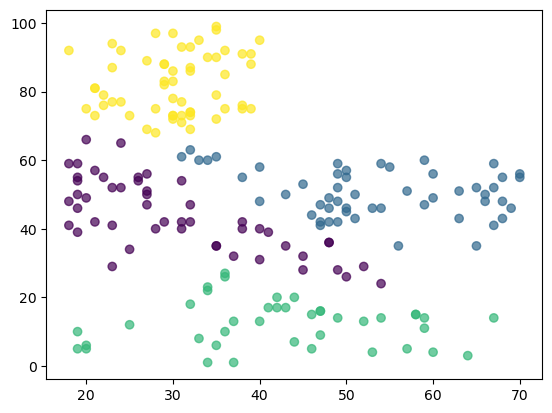

In [46]:
plt.scatter(X_age_ss["Age"],
            X_age_ss["Spending Score (1-100)"],
            c=agg_model.labels_,
            cmap="viridis",
            alpha=0.7)

In [47]:
# Create a dictionary to map cluster numbers to one-word labels
cluster_labels1 = {
    0: "Economical",
    1: "Spontaneous",
    2: "Prudent",
    3: "Generous"
}

# Assign labels to clusters in a new column 'Cluster Labels'
df_age_ss['Customer Type Agg'] = df_age_ss['cluster_Agg'].map(cluster_labels1)

In [48]:
df_age_ss

,Age,Spending Score (1-100),cluster_in_Kmeans,Customer Type,cluster_Agg,Customer Type Agg
0,19,39,3,Generous,0,Economical
1,21,81,1,Spontaneous,3,Generous
2,20,6,2,Prudent,2,Prudent
3,23,77,1,Spontaneous,3,Generous
4,31,40,3,Generous,0,Economical
...,...,...,...,...,...,...
195,35,79,1,Spontaneous,3,Generous
196,45,28,2,Prudent,0,Economical
197,32,74,1,Spontaneous,3,Generous
198,32,18,2,Prudent,2,Prudent


## Clustering based on Annual Income and Spending Score- x2

In [49]:
X_ai_ss.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Annual Income and Spending Score- x2

In [50]:
hc_ward = linkage(y=X_ai_ss, method="ward")
hc_complete = linkage(X_ai_ss, "complete")
hc_average = linkage(X_ai_ss, "average")
hc_single = linkage(X_ai_ss, "single")

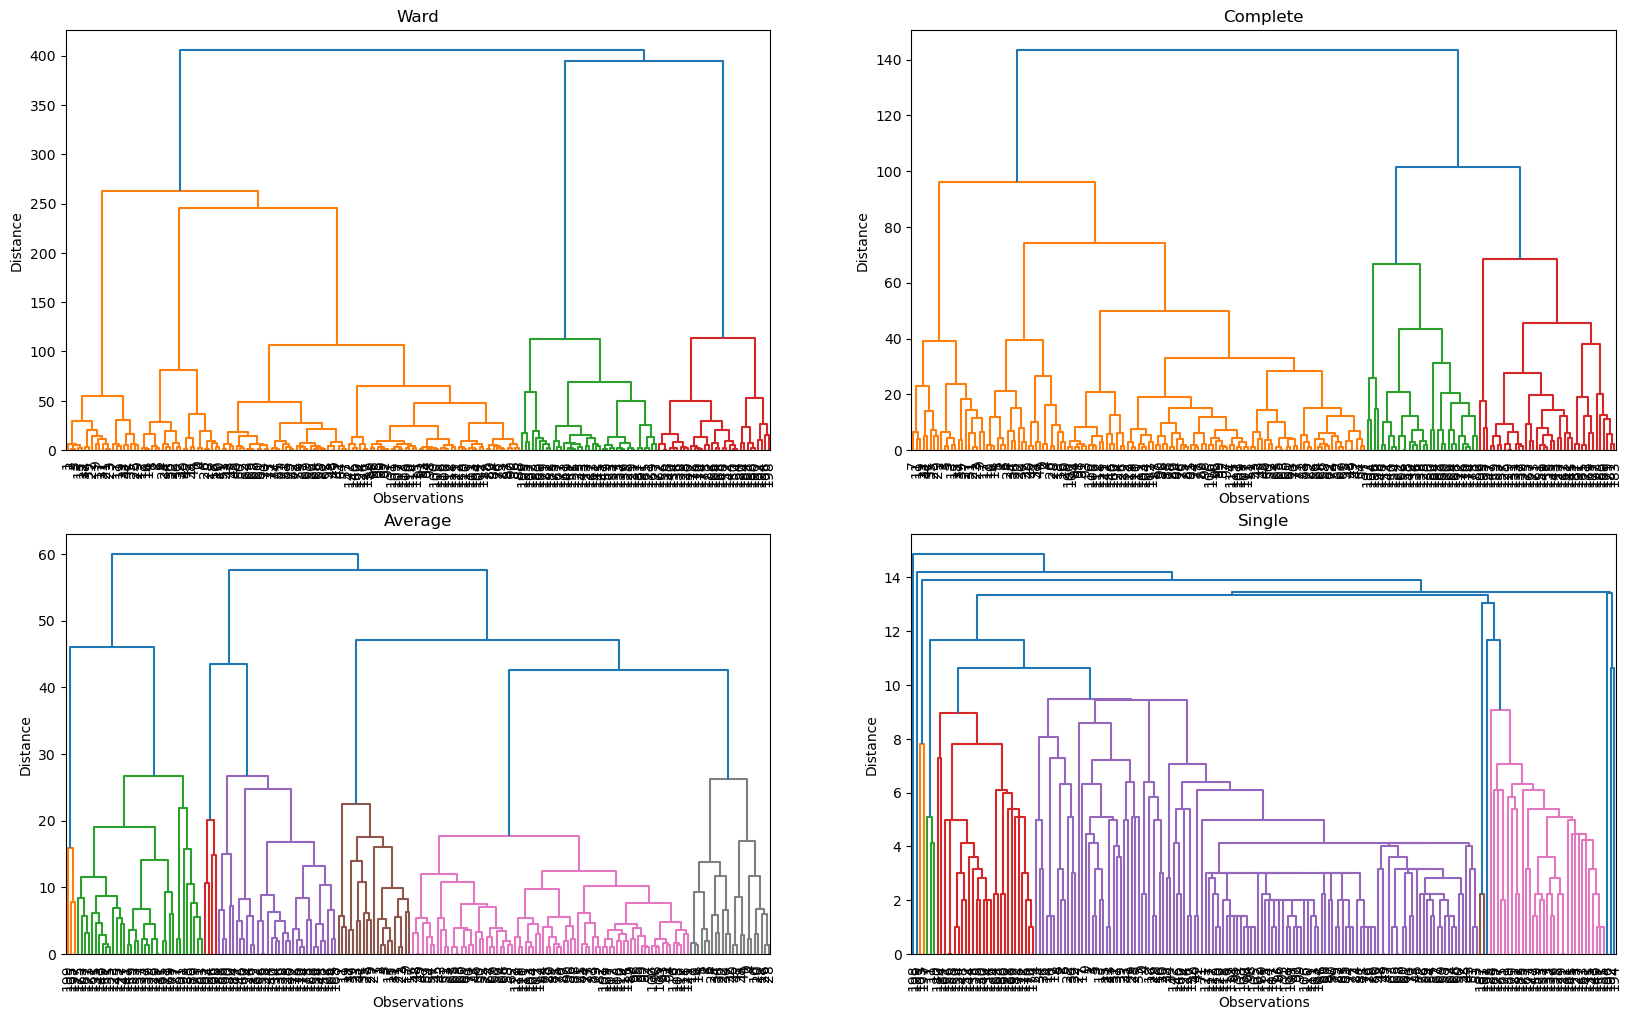

In [51]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

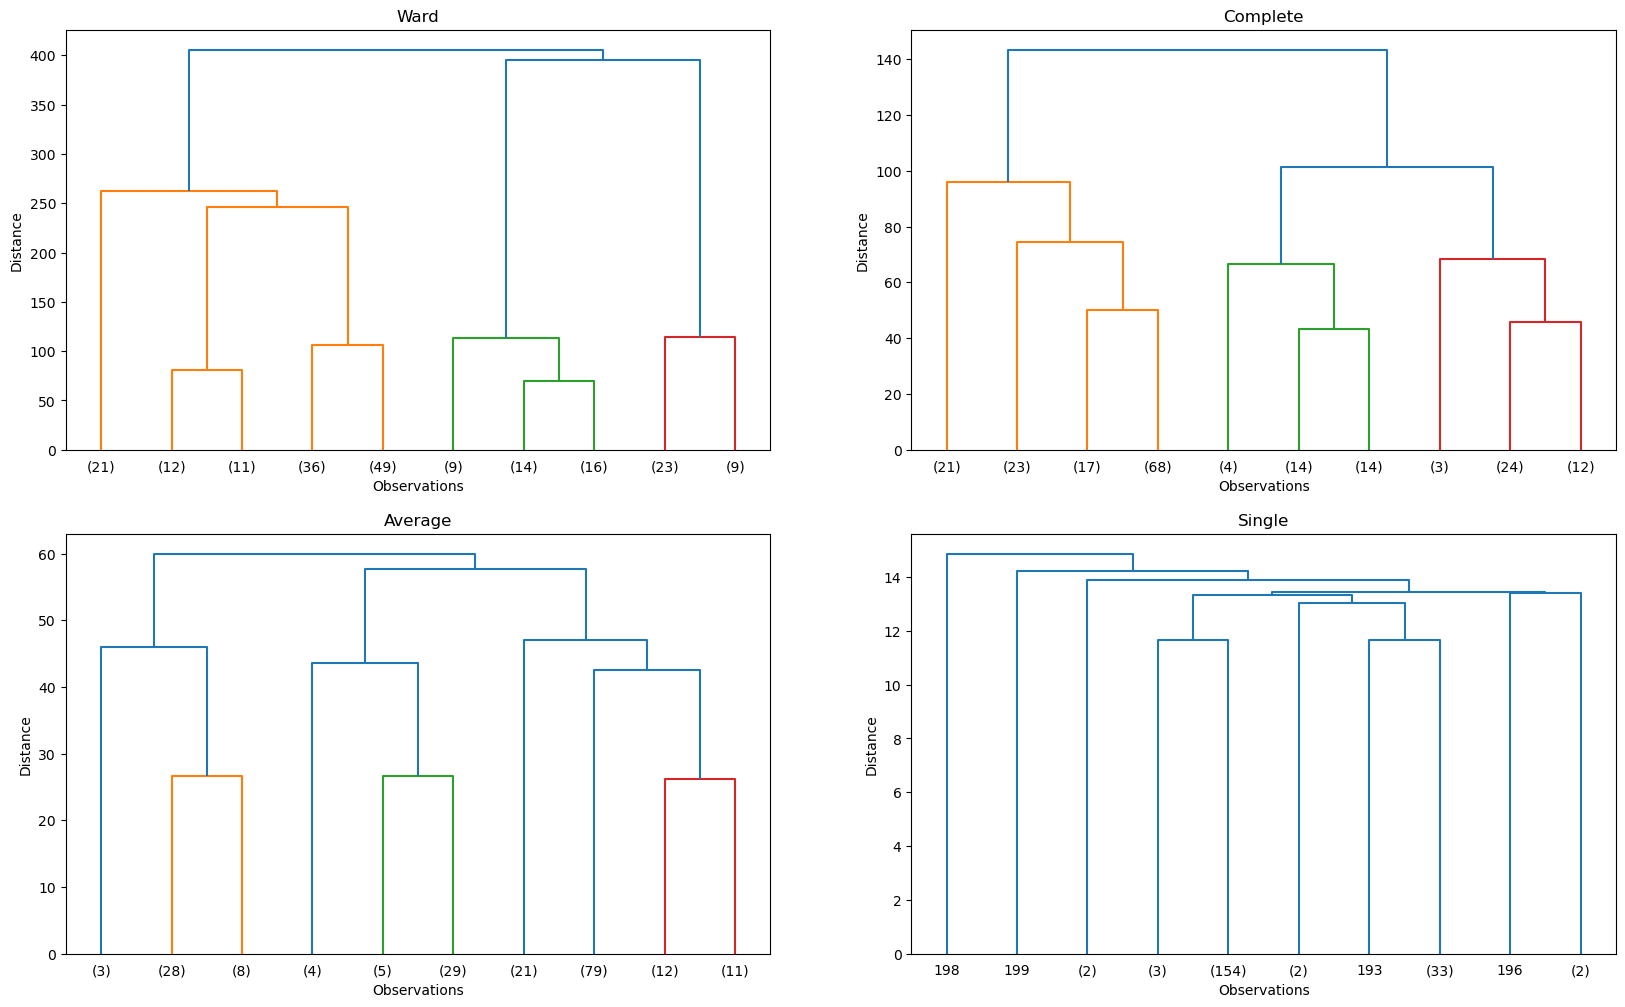

In [52]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# clearly 5 is the best choice

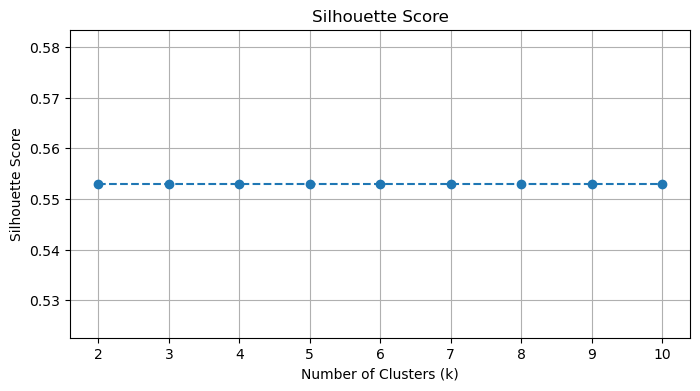

In [53]:
silhouette_scores = []
for k in range(2, 11):  # Considering cluster numbers from 2 to 10
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X_ai_ss)
    labels = Agg_model.labels_
    silhouette_avg = silhouette_score(X_ai_ss, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette score
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# shows pretty the same scores so i will stick with 5

In [54]:
hcmodel = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcmodel.fit(X_ai_ss)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [55]:
df_ai_ss['cluster_Agg'] = hcmodel.labels_
df_ai_ss.head()

,Annual Income (k$),Spending Score (1-100),cluster_in_Kmeans,Customer Type,cluster_Agg
0,15,39,3,Average,4
1,15,81,4,Luxury,3
2,16,6,3,Average,4
3,16,77,4,Luxury,3
4,17,40,3,Average,4


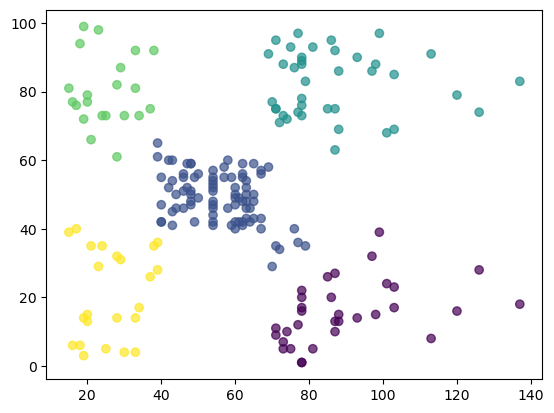

In [56]:
plt.scatter(X_ai_ss["Annual Income (k$)"],
            X_ai_ss["Spending Score (1-100)"],
            c=hcmodel.labels_,
            cmap="viridis",
            alpha=0.7)

In [57]:
df_ai_ss

,Annual Income (k$),Spending Score (1-100),cluster_in_Kmeans,Customer Type,cluster_Agg
0,15,39,3,Average,4
1,15,81,4,Luxury,3
2,16,6,3,Average,4
3,16,77,4,Luxury,3
4,17,40,3,Average,4
...,...,...,...,...,...
195,120,79,1,Affluent,2
196,126,28,2,Economical,0
197,126,74,1,Affluent,2
198,137,18,2,Economical,0


In [58]:
# Create a dictionary to map cluster numbers to labels
cluster_labels = {
    0: "Budget",
    1: "Affluent",
    2: "Economical",
    3: "Average",
    4: "Luxury"
}

# Assign labels to clusters in a new column 'Cluster Labels'
df_ai_ss['Customer Type Agg'] = df_ai_ss['cluster_Agg'].map(cluster_labels)

In [59]:
df_ai_ss

,Annual Income (k$),Spending Score (1-100),cluster_in_Kmeans,Customer Type,cluster_Agg,Customer Type Agg
0,15,39,3,Average,4,Luxury
1,15,81,4,Luxury,3,Average
2,16,6,3,Average,4,Luxury
3,16,77,4,Luxury,3,Average
4,17,40,3,Average,4,Luxury
...,...,...,...,...,...,...
195,120,79,1,Affluent,2,Economical
196,126,28,2,Economical,0,Budget
197,126,74,1,Affluent,2,Economical
198,137,18,2,Economical,0,Budget


#### Interpretation based on Age and Spending Score- x1

In [60]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [61]:
df_age_ss

,Age,Spending Score (1-100),cluster_in_Kmeans,Customer Type,cluster_Agg,Customer Type Agg
0,19,39,3,Generous,0,Economical
1,21,81,1,Spontaneous,3,Generous
2,20,6,2,Prudent,2,Prudent
3,23,77,1,Spontaneous,3,Generous
4,31,40,3,Generous,0,Economical
...,...,...,...,...,...,...
195,35,79,1,Spontaneous,3,Generous
196,45,28,2,Prudent,0,Economical
197,32,74,1,Spontaneous,3,Generous
198,32,18,2,Prudent,2,Prudent


[Text(0, 0, '57'), Text(0, 0, '48'), Text(0, 0, '48'), Text(0, 0, '47')]

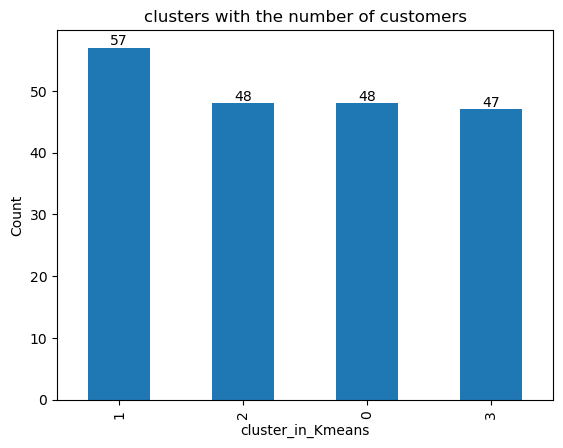

In [62]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_age_ss.cluster_in_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending Score (1-100)'>

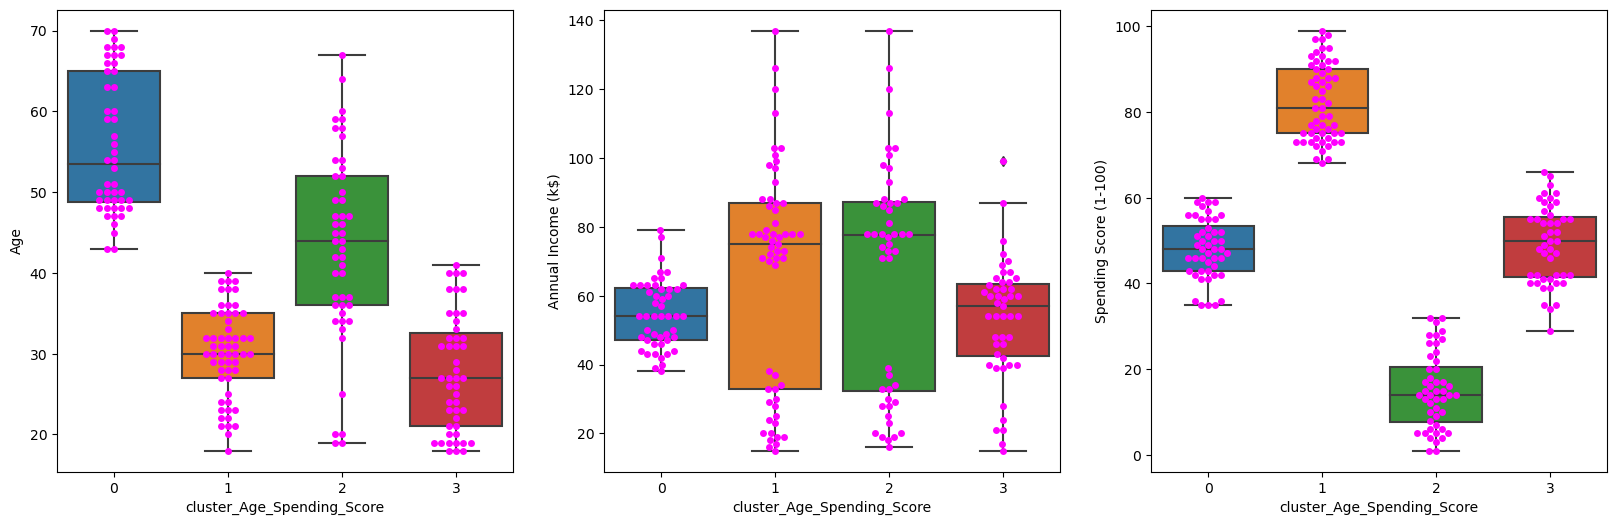

In [63]:
df["cluster_Age_Spending_Score"] = df_age_ss.cluster_in_Kmeans

plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(132)
sns.boxplot(y="Annual Income (k$)", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual Income (k$)",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

plt.subplot(133)
sns.boxplot(y="Spending Score (1-100)", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending Score (1-100)",
              x="cluster_Age_Spending_Score",
              data=df,
              color="magenta")

In [64]:
# Define a mapping for Gender
gender_mapping = {'Male': 1, 'Female': 0}

# Map the 'Gender' column
df['Gender'] = df['Gender'].map(gender_mapping)

df.groupby("cluster_Age_Spending_Score").mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster_Age_Spending_Score,,,,
0,0.458333,55.708333,54.770833,48.229167
1,0.421053,30.175439,66.070175,82.350877
2,0.500000,43.291667,66.937500,15.020833
3,0.382979,27.617021,53.276596,49.148936


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 30, the annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend..    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [65]:
df_ai_ss

,Annual Income (k$),Spending Score (1-100),cluster_in_Kmeans,Customer Type,cluster_Agg,Customer Type Agg
0,15,39,3,Average,4,Luxury
1,15,81,4,Luxury,3,Average
2,16,6,3,Average,4,Luxury
3,16,77,4,Luxury,3,Average
4,17,40,3,Average,4,Luxury
...,...,...,...,...,...,...
195,120,79,1,Affluent,2,Economical
196,126,28,2,Economical,0,Budget
197,126,74,1,Affluent,2,Economical
198,137,18,2,Economical,0,Budget


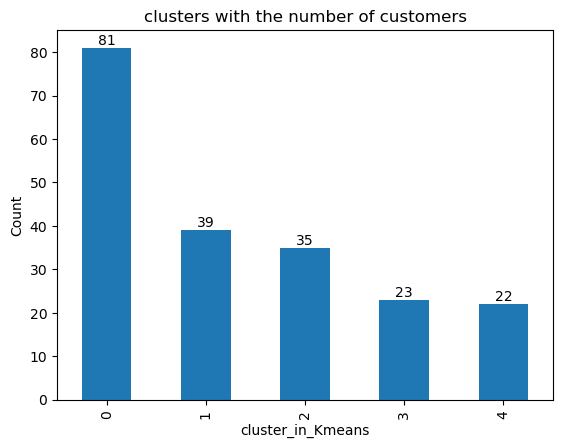

In [66]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_ai_ss.cluster_in_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [67]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [68]:
df["cluster_Annual_Income_Spending_Score"] = df_ai_ss.cluster_in_Kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Annual_Income_Spending_Score
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


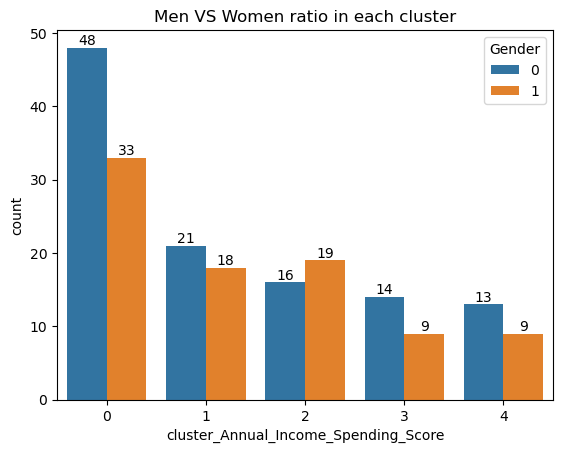

In [69]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [70]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# here we group df by both Gender and cluster_Annual_Income_Spending_Score.

Age  Annual Income (k$)  \
Gender cluster_Annual_Income_Spending_Score                                  
0      0                                     40.895833           55.354167   
       1                                     32.190476           86.047619   
       2                                     43.250000           90.937500   
       3                                     43.214286           27.357143   
       4                                     25.461538           25.692308   
1      0                                     45.363636           55.212121   
       1                                     33.277778           87.111111   
       2                                     39.315789           85.894737   
       3                                     48.333333           24.666667   
       4                                     25.000000           25.777778   

                                             Spending Score (1-100)  
Gender cluster_Annual_Income_Spending_Score                          
0      0                                                  49.000000  
       1                                                  81.666667  
       2                                                  22.062500  
       3                                                  21.714286  
       4                                                  80.538462  
1      0                                                  50.272727  
       1                                                  82.666667  
       2                                                  12.947368  
       3                                                  19.666667  
       4                                                  77.666667

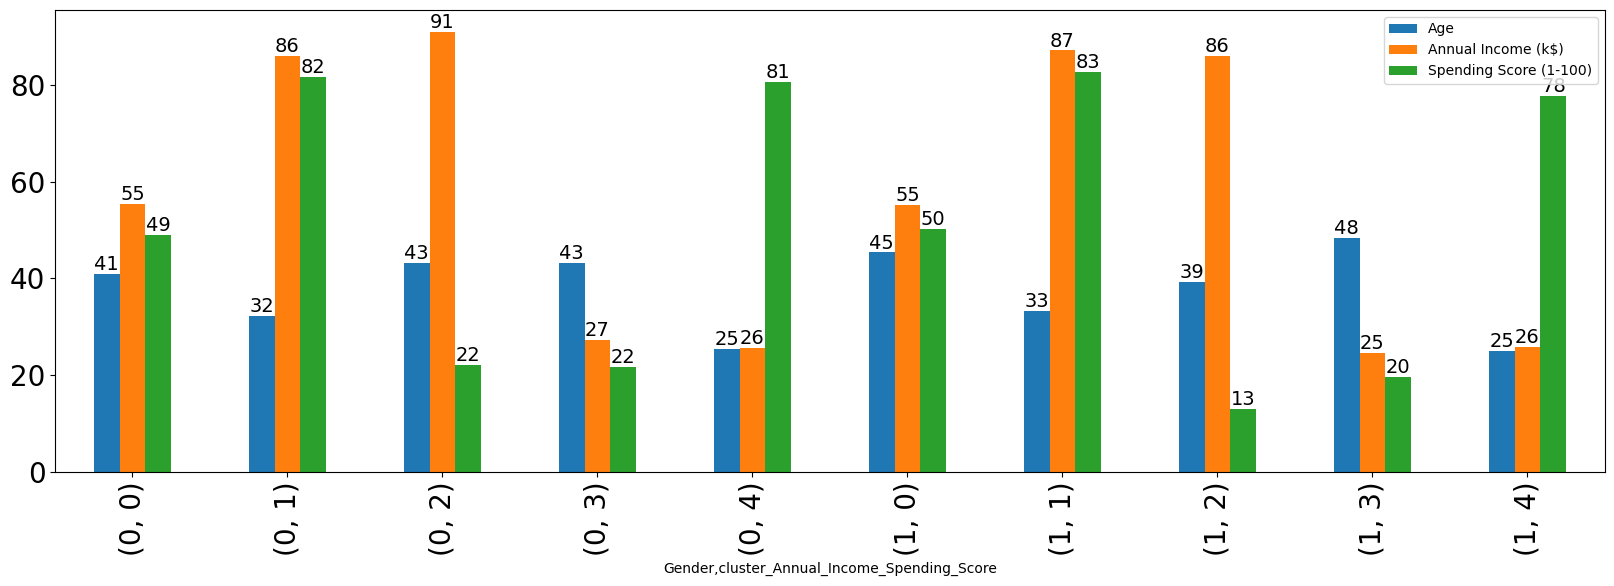

In [71]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

# 1 stands for male and 0 stands for female

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

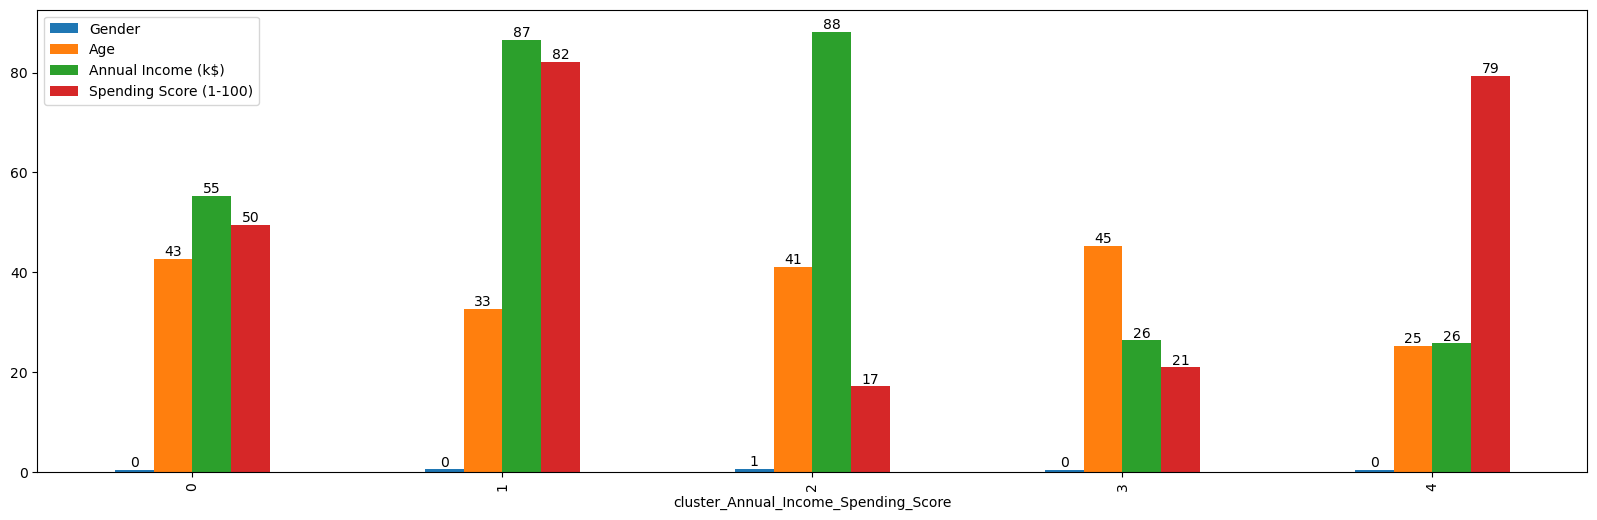

In [72]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___